# Tasks

1. Datasets
2. Exploring the data structure
3. Summarizing the data
4. Vizualise features
5. Scatter plot
7. Analyse class distribution

## Task 1: Datasets

In [1]:
# Data Frames.
import pandas as pd

# Machine Learning Library that contains example datasets
import sklearn as skl

### Loading Datasets

Dataset source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [2]:
# Load the Dataset
iris = skl.datasets.load_iris()

In [3]:
# Look at the data.
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

While the load-iris function doesn't visually return anything, it does however pull the dataset from the specified location. Through further analysis of the dataset by the 'data' command, it can be seen that the array is based on 4 different measurements, for each of the 150 samples. In addition to this, it shows that there are 3 different flower types being measured.

## Task 2: Exploring the Data Structure

The data displayed above shows the shape and various aspects of the dataset however, these can be verified through the following commands.

In [4]:
# dataset shape
iris['data'].shape

(150, 4)

In [5]:
# Target Names
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Feature Names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The above three commands confirm the dataset has 150 rows and 4 columns, shows the 3 array names (target names) of Setosa, Versicolor, and Virginica.

As documented in the link below however, when importing the iris data through sklearn, it is not presented in a dataframe format. This is the preferred format when using pandas.

Information source: https://discuss.datasciencedojo.com/t/common-mistakes-which-occur-when-working-with-the-iris-dataset-in-python/1414

The below code, to convert to a dataframe, can be seen to specify the data (iris.data), the columns under which the data is structured (iris.feature_names), and the different array for each measurement.

In [7]:
# convert the data into a DataFrame
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# convert the 'species' column to call out correct names.
# source: https://stackoverflow.com/questions/43159754/datasets-load-iris-in-python

df['species'] = df['species'].replace(to_replace = [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

This now allows to easily review different portions of the dataset

In [10]:
# show first 5 rows of the data (5 is the default when no value is specified)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# show last 5 rows of the data (5 is the default when no value is specified)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Output Review

As a result of converting to a dataframe format, the df.head and df.tail commands above clearly present the first 5 and last 5 rows of measurements. It can be seen that the first 5 rows relate to the first array, whereas the last 5 are measurements for the third array. Some variation can be seen within each array, but this is noticeably larger when comparing one array against the other.



# Task 3: Summarizing the Data

In [12]:
# show mean, minimum, maximum, standard deviation, and median for all 4 features

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Task 4: Visualize Features

In [13]:
# plots
import matplotlib.pyplot as plt
import numpy as np

# seaborn required to allow for overlapping of plots
import seaborn as sns


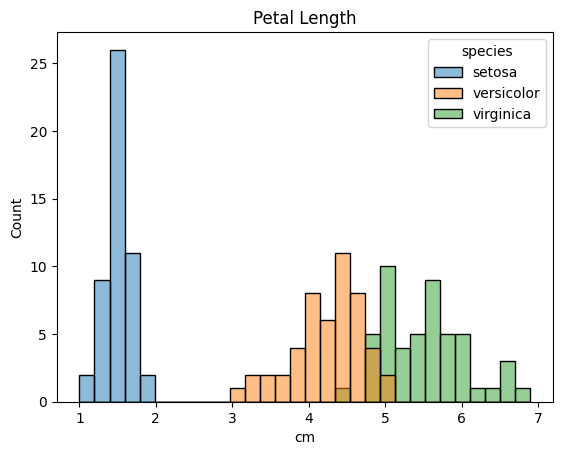

In [14]:
# source: https://seaborn.pydata.org/generated/seaborn.histplot.html

sns.histplot(data=df, x="petal length (cm)", hue = 'species', binwidth=0.2)
plt.title('Petal Length')
plt.xlabel('cm');


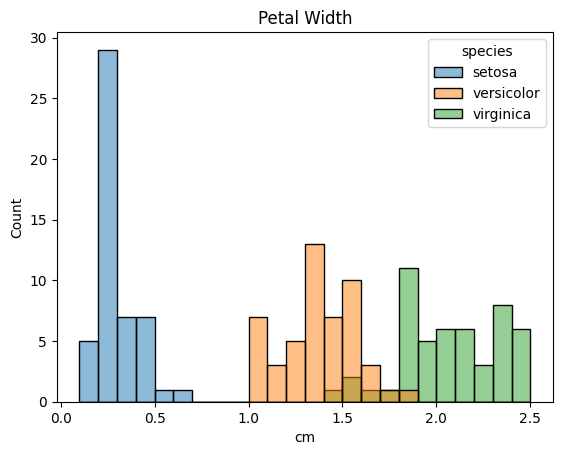

In [15]:
sns.histplot(data=df, x="petal width (cm)", hue = 'species', binwidth=0.1)
plt.title('Petal Width')
plt.xlabel('cm');

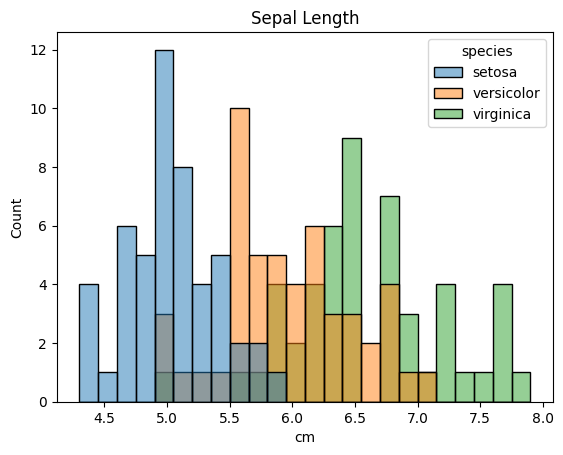

In [16]:
sns.histplot(data=df, x="sepal length (cm)", hue = 'species', binwidth=0.15)
plt.title('Sepal Length')
plt.xlabel('cm');

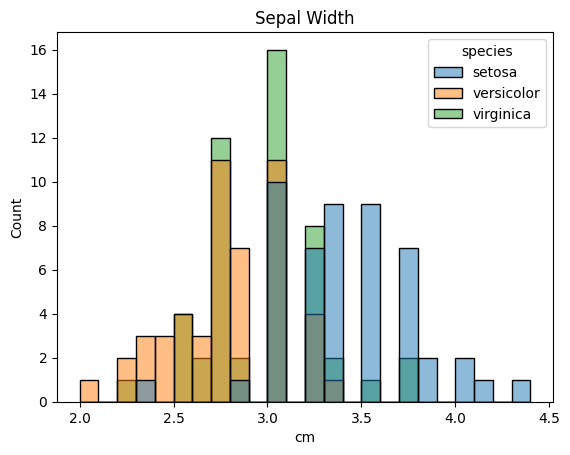

In [17]:
sns.histplot(data=df, x="sepal width (cm)", hue = 'species', binwidth=0.1)
plt.title('Sepal Width')
plt.xlabel('cm');

# Task 5: Scatter Plot

The 2 features selected for analysis are sepal length and sepal width. 

To create the scatter plot, the measurements for each feature must be specified. As per below, it can be seen that column 0 is the sepal lenghth, with column 1 being the sepal width

In [32]:
# verification of column numbers
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Knowing the columns, the scatter plot can be created, applying sepal length (column 0) measurements on the x-axis, and sepal width (column 1) on the y-axis

To differentiate the three species, colours can also be applied against the 3 different species, or targets as specified in the code

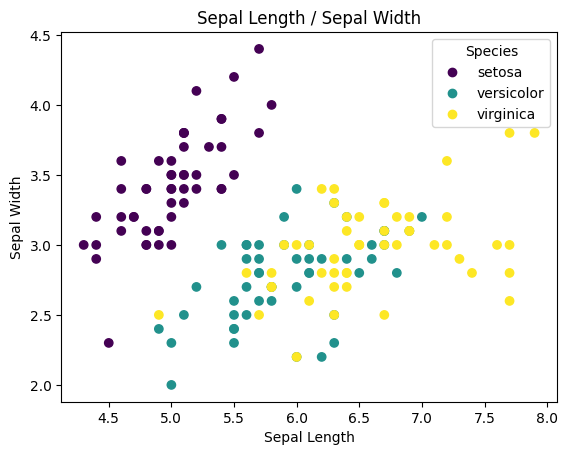

In [ ]:
# Create a figure and an axis.
fig, ax = plt.subplots()

# Scatter plot.
scatter = ax.scatter(iris.data[:,0], iris.data[:,1], c = iris.target)

# Labels.
ax.set_title('Sepal Length / Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend(scatter.legend_elements()[0], iris.target_names, title = 'Species'); # source: https://www.statology.org/matplotlib-scatterplot-legend/


From the above scatter plot, it can be seen that with the exception of a single outlier, the rest of the Setosa species are very clustered, following a trend of shorter sepal length with a larger width. A similar differentiation can not be applied to the Versicolor and Virginica species, as their plots are general mixed and overlapping.

# Task 7: Analyze Class Distribution

Struggled to manage creating a single boxplot which captured the 3 different species. Resorted to the below method.

In [ ]:
# separate the dataset to have solely petal length, and species
column = df[['petal length (cm)' , 'species']]

# pull only the setosa measurements
setosa_grp = column.loc[df['species'] == 'setosa']

# then only take the petal length column
setosa_plt = setosa_grp['petal length (cm)']

# repeat for the remaining 2 species
versicolor_grp = column.loc[df['species'] == 'versicolor']
versicolor_plt = versicolor_grp['petal length (cm)']
virginica_grp = column.loc[df['species'] == 'virginica']
virginica_plt = virginica_grp['petal length (cm)']

In [ ]:
# print boxplot of the above 3 new groups

fig, ax = plt.subplots()

plot_data = ([setosa_plt, versicolor_plt, virginica_plt])
ax.boxplot(plot_data);


The above appeared to be a very long method for what would be considered a regular task. I therefore found the below process, which is much quicker with the same results

source: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
sns.boxplot (x = "species", y = "petal length (cm)", data=df)
plt.show;

## End